<a href="https://colab.research.google.com/github/LohitSubodh/Deep-Learning-with-PyTorch-Zero-to-GANs/blob/main/CNN_mnist_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.utils.colab.set_colab_file_id('1yljnKCdrn0h9D98Y-ZLLbdfgSa-8dRXS')

In [ ]:
!pip install jovian --upgrade --quiet

# Image Classification using CNN for MNIST-fashion dataset.

## Importing necessary Libraries

In [ ]:
from keras.datasets import fashion_mnist


In [ ]:
# importing the libraries
import pandas as pd
import numpy as np

# for reading and displaying images
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
# from tqdm import tqdm

# PyTorch libraries and modules
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD


## Loading the dataset

In [ ]:
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


It is a dataset comprised of 60,000 small square 28×28 pixel grayscale images of items of 10 types of clothing, such as shoes, t-shirts, dresses, and more. The mapping of all 0-9 integers to class labels is listed below.



*   0: T-shirt/top
*   1: Trouser
*   2: Pullover
*   3: Dress
*   4: Coat
*   5: Sandal
*   6: Shirt
*   7: Sneaker
*   8: Bag
*   9: Ankle boot



## Exploring the dataset

In [ ]:
# printing the shape of training and test data
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


(<matplotlib.axes._subplots.AxesSubplot at 0x7fc4ed76efd0>,
 <matplotlib.image.AxesImage at 0x7fc4ed72e240>)

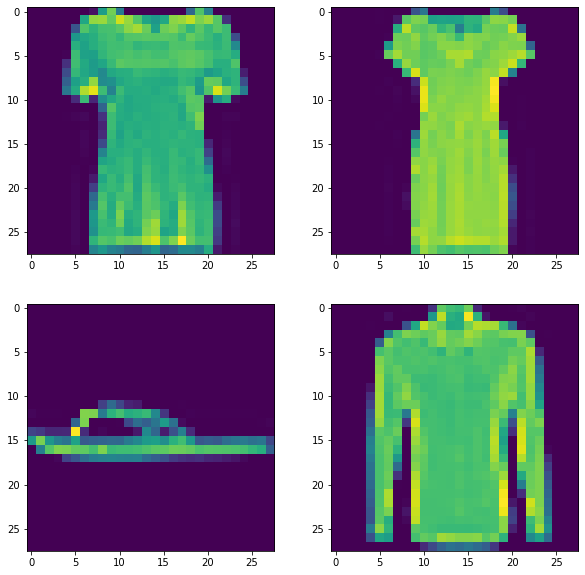

In [ ]:
# visualizing images
plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(trainX[10])
plt.subplot(222), plt.imshow(trainX[20])
plt.subplot(223), plt.imshow(trainX[30])
plt.subplot(224), plt.imshow(trainX[40])

## Creating validation set

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(trainX, trainY, test_size = 0.1)
(train_x.shape, train_y.shape), (val_x.shape, val_y.shape)

(((54000, 28, 28), (54000,)), ((6000, 28, 28), (6000,)))

## Preprocessing images

In [ ]:
# converting training images into torch format
train_x = train_x.reshape(54000, 1, 28, 28)
train_x  = torch.from_numpy(train_x)

# converting the target into torch format
train_y = train_y.astype(int)
train_y = torch.from_numpy(train_y)

# shape of training data
train_x.shape, train_y.shape

(torch.Size([54000, 1, 28, 28]), torch.Size([54000]))

In [ ]:
# converting validation images into torch format
val_x = val_x.reshape(6000, 1, 28, 28)
val_x  = torch.from_numpy(val_x)

# converting the target into torch format
val_y = val_y.astype(int)
val_y = torch.from_numpy(val_y)

# shape of validation data
val_x.shape, val_y.shape

(torch.Size([6000, 1, 28, 28]), torch.Size([6000]))

## Implementing CNN

In [ ]:
## Architecture

class Net(Module):   
    def __init__(self):
        super(Net, self).__init__()

        self.cnn_layers = Sequential(
            # Defining a 2D convolution layer
            Conv2d(1, 4, kernel_size=2, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            # Defining another 2D convolution layer
            Conv2d(4, 4, kernel_size=2, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2)
        )

        self.linear_layers = Sequential(
            Linear(4 * 7 * 7, 10)
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

In [ ]:
# define the model
model = Net()
# define the optimizer
optimizer = Adam(model.parameters(), lr=0.07)
# defining the loss function
criterion = CrossEntropyLoss()
# checking if GPU is available
if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()
    
print(model)

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 4, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(4, 4, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=196, out_features=10, bias=True)
  )
)


In [ ]:
jovian.commit(project='assignment-04')

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/2017meb1219/assignment-04


'https://jovian.ai/2017meb1219/assignment-04'

In [ ]:
## function to train the model

def train(epoch):
    model.train()
    tr_loss = 0
    # getting the training set
    x_train, y_train = Variable(train_x), Variable(train_y)
    # getting the validation set
    x_val, y_val = Variable(val_x), Variable(val_y)
    # converting the data into GPU format
    if torch.cuda.is_available():
        x_train = x_train.cuda()
        y_train = y_train.cuda()
        x_val = x_val.cuda()
        y_val = y_val.cuda()

    # clearing the Gradients of the model parameters
    optimizer.zero_grad()
    
    # prediction for training and validation set
    x_train = x_train.float()
    x_val = x_val.float()
    output_train = model(x_train)
    output_val = model(x_val)

    # computing the training and validation loss
    loss_train = criterion(output_train, y_train)
    loss_val = criterion(output_val, y_val)
    train_losses.append(loss_train)
    val_losses.append(loss_val)

    # computing the updated weights of all the model parameters
    loss_train.backward()
    optimizer.step()
    tr_loss = loss_train.item()
    
    print('Epoch : ',epoch+1, '\t', 'loss :', loss_val)

## Training data

In [ ]:
# defining the number of epochs
n_epochs = 25
# empty list to store training losses
train_losses = []
# empty list to store validation losses
val_losses = []
# training the model
for epoch in range(n_epochs):
    train(epoch)

Epoch :  1 	 loss : tensor(2.3387, grad_fn=<NllLossBackward>)
Epoch :  2 	 loss : tensor(3.9383, grad_fn=<NllLossBackward>)
Epoch :  3 	 loss : tensor(3.0780, grad_fn=<NllLossBackward>)
Epoch :  4 	 loss : tensor(2.2318, grad_fn=<NllLossBackward>)
Epoch :  5 	 loss : tensor(2.0369, grad_fn=<NllLossBackward>)
Epoch :  6 	 loss : tensor(1.7675, grad_fn=<NllLossBackward>)
Epoch :  7 	 loss : tensor(1.5890, grad_fn=<NllLossBackward>)
Epoch :  8 	 loss : tensor(1.4530, grad_fn=<NllLossBackward>)
Epoch :  9 	 loss : tensor(1.3497, grad_fn=<NllLossBackward>)
Epoch :  10 	 loss : tensor(1.2559, grad_fn=<NllLossBackward>)
Epoch :  11 	 loss : tensor(1.1510, grad_fn=<NllLossBackward>)
Epoch :  12 	 loss : tensor(1.0527, grad_fn=<NllLossBackward>)
Epoch :  13 	 loss : tensor(0.9765, grad_fn=<NllLossBackward>)
Epoch :  14 	 loss : tensor(0.9164, grad_fn=<NllLossBackward>)
Epoch :  15 	 loss : tensor(0.8656, grad_fn=<NllLossBackward>)
Epoch :  16 	 loss : tensor(0.8266, grad_fn=<NllLossBackward>)
E

## Results on Training and Test data

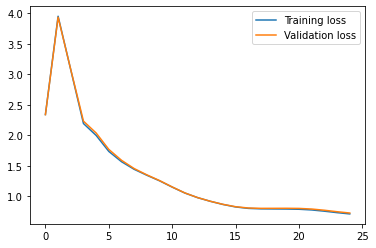

In [ ]:
# plotting the training and validation loss
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.show()

In [ ]:
# prediction for training set
with torch.no_grad():
    train_x = train_x.float()
    output = model(train_x)
    
softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

# accuracy on training set
accuracy_score(train_y, predictions)

0.7652962962962963

We obtained the accuracy of 76% on training dataset.

In [ ]:
# check labels for predicted and actual values for first 5 training data
print(train_y[:5])
print(predictions[:5])

tensor([6, 4, 2, 5, 2])
[6 4 2 5 2]


In [ ]:
# prediction for validation set
with torch.no_grad():
    val_x = val_x.float()
    output = model(val_x)

softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

# accuracy on validation set
accuracy_score(val_y, predictions)

0.7595

In [ ]:
# check labels for predicted and actual values for first 5 validation data
print(val_y[:5])
print(predictions[:5])

tensor([6, 9, 0, 7, 2])
[0 9 6 7 6]


In [ ]:

testX.shape

(10000, 28, 28)

In [ ]:
test_x = testX.reshape(10000, 1, 28, 28)
test_x  = torch.from_numpy(test_x)
test_x.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  


torch.Size([10000, 1, 28, 28])

In [ ]:
# generating predictions for test set
with torch.no_grad():
    test_x = test_x.float()
    output = model(test_x)

softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

In [ ]:
test_y = testY.astype(int);
test_y = torch.from_numpy(test_y)

In [ ]:
accuracy_score(test_y, predictions)

0.7557

We recieved the accuracy of 75% on test dataset.

In [ ]:
# check labels for predicted and actual values for first 5 test data
print(test_y[:5])
print(predictions[:5])

tensor([9, 2, 1, 1, 6])
[9 2 1 1 6]


In [ ]:
# save the model
torch.save(model.state_dict(), 'mnist-fashion.pth')

In [ ]:
jovian.commit(project='assignment-04',outputs=['mnist-fashion.pth'], environment=None)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Uploading additional outputs...
[jovian] Committed successfully! https://jovian.ai/2017meb1219/assignment-04


'https://jovian.ai/2017meb1219/assignment-04'

## Future Work



*   Improve accuracy by tuning hyperparameters such as number of CNN layers,number of epochs,number of filters etc.
*   Try with other optimizer such as RMSProp,SGD etc.
*   Try with other Regularizations such as dropout,early stopping etc.


